# EDA: describe

Es una ampliacion de la informacion descriptiva del metodo *describe()* de *Pandas*.

In [1]:
%matplotlib inline
import sys
sys.path.append('../') 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from datetime import datetime
from eda import describe_info, describe_numeric, describe_categorical, describe_datetime, describe_bivariate, describe_missing, describe_duplicates, describe_outliers

---
## LOAD *Iris* data

In [2]:
# load dataset
dataset = load_iris()
dataset.keys()
# dataset to df
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data['class'] = dataset.target
dclass = dict()
for i, ic in enumerate(dataset.target_names):
    dclass[i] = ic
data['class'] = data['class'].map(dclass)

### general info

In [3]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
sepal length (cm),float64,float,35,0.0,0.0,150
sepal width (cm),float64,float,23,0.0,0.0,150
petal length (cm),float64,float,43,0.0,0.0,150
petal width (cm),float64,float,22,0.0,0.0,150
class,object,numpy.str_,3,NaN,0.0,150


### numerical

In [5]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 2.36 seconds.


,count,mode,mode_per,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,expo,unimodal
sepal length (cm),150,5.0,6.67,5.84,0.83,1.3,4.3,4.60,5.1,5.80,6.4,7.25,7.9,-0.57,0.31,False,False,False,True
sepal width (cm),150,3.0,17.33,3.06,0.44,0.5,2.0,2.34,2.8,3.00,3.3,3.80,4.4,0.18,0.32,False,True,False,True
petal length (cm),150,1.4,8.67,3.76,1.77,3.5,1.0,1.30,1.6,4.35,5.1,6.10,6.9,-1.40,-0.27,False,False,False,False
petal width (cm),150,0.2,19.33,1.20,0.76,1.5,0.1,0.20,0.3,1.30,1.8,2.30,2.5,-1.34,-0.10,False,False,False,True


### categorical

In [6]:
# describe
dfc = describe_categorical(data, max_size_cats = 3, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.02 seconds.


,count,unique,uniform,value0,value1,value2,%value0,%value1,%value2
var,,,,,,,,,
class,150,3,True,virginica,versicolor,setosa,33.33,33.33,33.33


### bivariate relationship

In [7]:
describe_bivariate(data)

[info] Function "describe_bivariate()" finished in 2.49 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,sepal length (cm),sepal width (cm),True,-0.22,0.32,NaN,NaN
1,sepal length (cm),petal length (cm),True,0.88,0.77,NaN,NaN
2,sepal length (cm),petal width (cm),True,0.84,0.72,NaN,NaN
3,sepal width (cm),petal length (cm),True,-0.52,0.43,NaN,NaN
4,sepal width (cm),petal width (cm),True,-0.41,0.45,NaN,NaN
5,petal length (cm),petal width (cm),True,0.96,0.85,NaN,NaN
0,class,petal length (cm),NaN,NaN,NaN,NaN,True
1,class,petal width (cm),NaN,NaN,NaN,NaN,True
2,class,sepal length (cm),NaN,NaN,NaN,NaN,True
3,class,sepal width (cm),NaN,NaN,NaN,NaN,True


### missing values

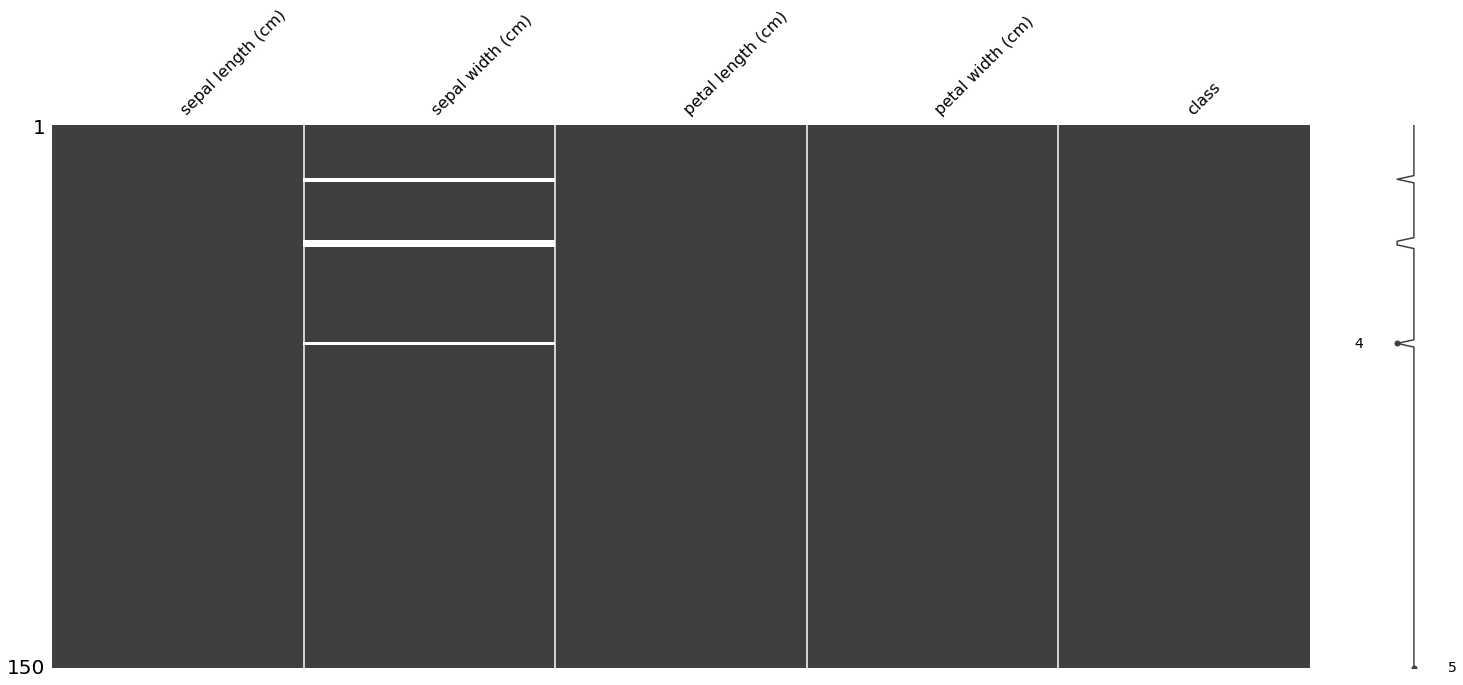

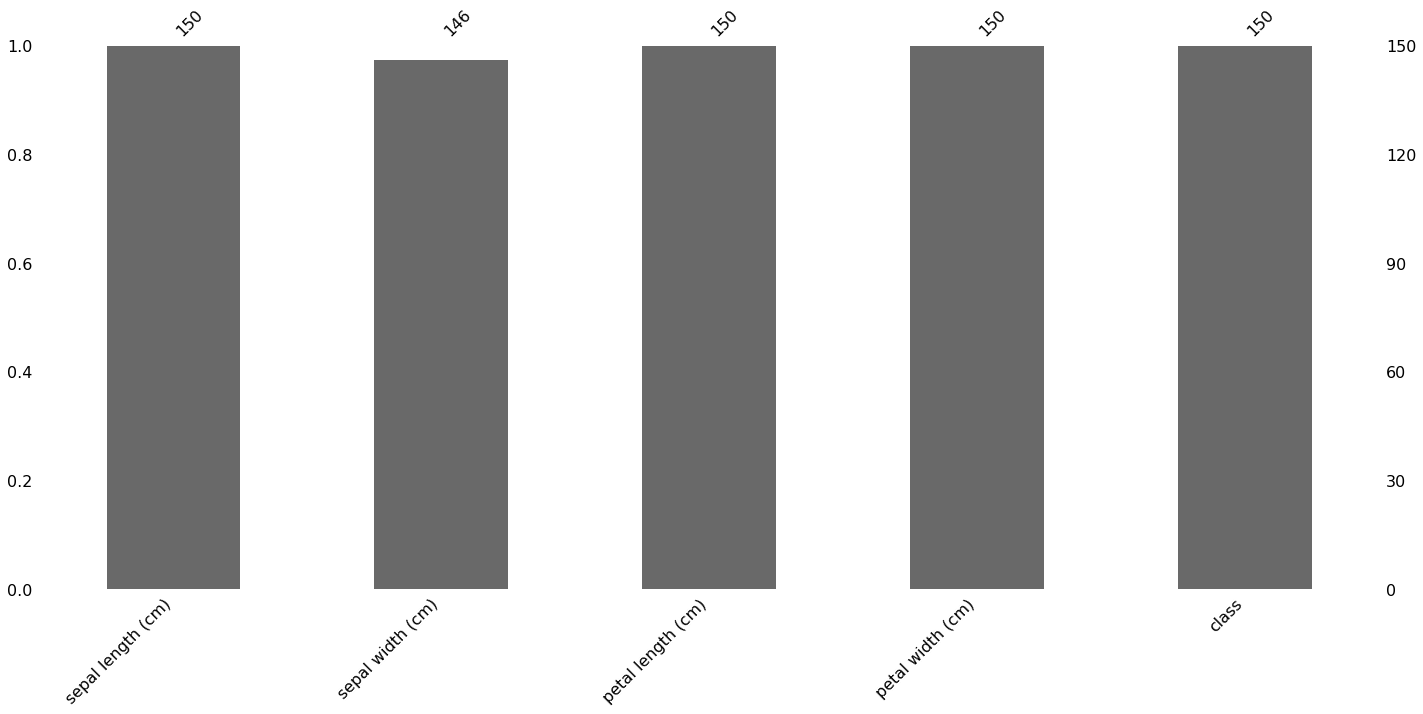

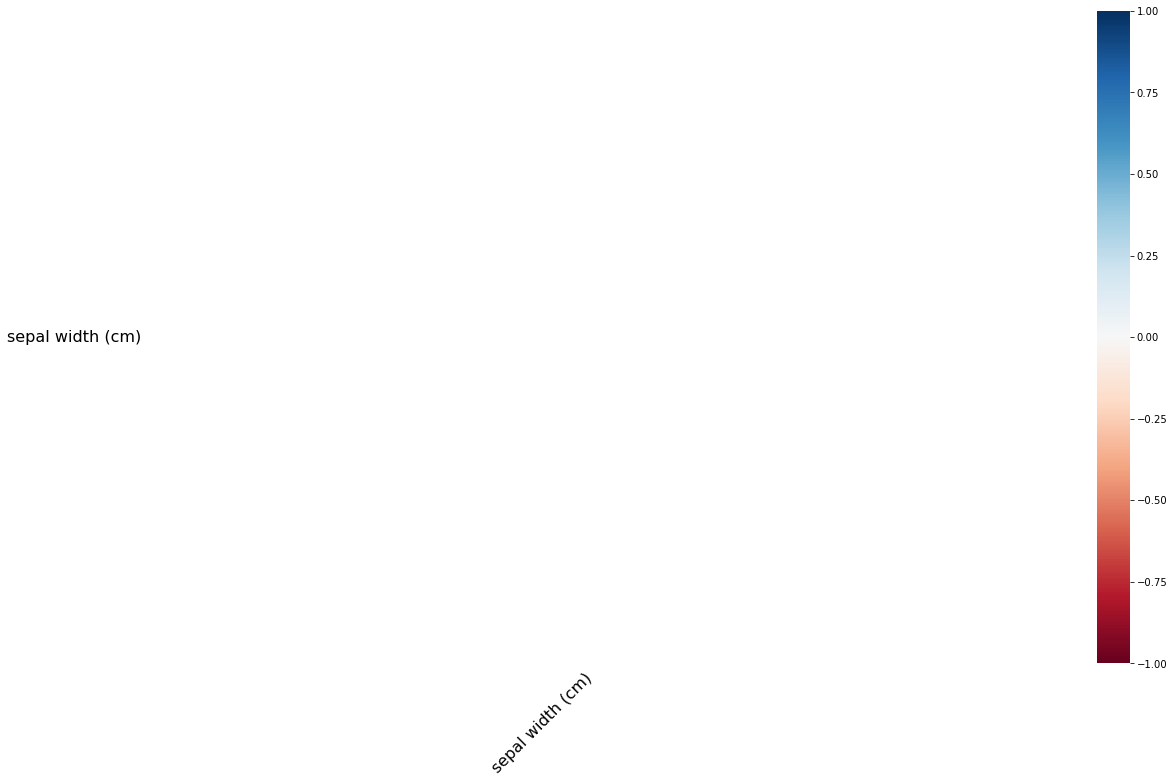

In [8]:
describe_missing(data)

### outliers analysis

In [9]:
describe_outliers(data)

There are not any outlier in numerical columns.


### duplicates

In [10]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.01 seconds.


,col0,num_cols,percent_dupli
0,class,1,98.0
